In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yahooFinance
 
 
gold_price = yahooFinance.Ticker("GC=F")

In [5]:
data = gold_price.history(period="2y")

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442,0,0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476,0,0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3,0,0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638,0,0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389,0,0
...,...,...,...,...,...,...,...
2022-03-18,1934.500000,1939.300049,1928.199951,1928.199951,28,0,0
2022-03-21,1925.400024,1928.599976,1925.000000,1928.599976,5,0,0
2022-03-22,1920.699951,1920.699951,1920.699951,1920.699951,26,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2020-03-24 to 2022-03-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          507 non-null    float64
 1   High          507 non-null    float64
 2   Low           507 non-null    float64
 3   Close         507 non-null    float64
 4   Volume        507 non-null    int64  
 5   Dividends     507 non-null    int64  
 6   Stock Splits  507 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 31.7 KB


In [8]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442,0,0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476,0,0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3,0,0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638,0,0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389,0,0
2020-03-31,1618.699951,1621.000000,1576.000000,1583.400024,2874,0,0
2020-04-01,1570.000000,1600.000000,1570.000000,1578.199951,2158,0,0
2020-04-02,1590.900024,1631.199951,1586.000000,1625.699951,1294,0,0
2020-04-03,1624.500000,1636.000000,1619.800049,1633.699951,643,0,0


In [11]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,507.0,1817.798424,80.071040,1570.000000,1767.750000,1806.000000,1873.799988,2053.600098
High,507.0,1827.900001,80.271195,1600.000000,1777.300049,1813.699951,1883.399963,2072.000000
Low,507.0,1807.988165,79.261312,1570.000000,1759.650024,1799.500000,1868.150024,2040.000000
Close,507.0,1818.201575,79.706228,1578.199951,1767.250000,1808.300049,1875.799988,2051.500000
Volume,507.0,4755.897436,25396.081705,0.000000,96.500000,276.000000,734.500000,209835.000000
Dividends,507.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stock Splits,507.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='Close', ylabel='Density'>

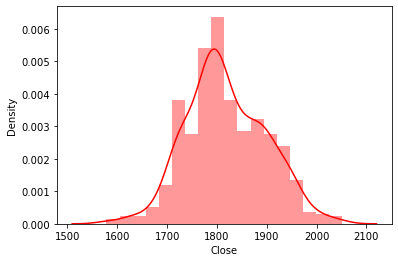

In [13]:
sns.distplot(data['Close'],color='red')

## EDA

In [14]:
data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442,0,0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476,0,0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3,0,0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638,0,0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389,0,0


In [15]:
data.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True,axis=0)

In [17]:
data

,Open,High,Low,Close
Date,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000
...,...,...,...,...
2022-03-18,1934.500000,1939.300049,1928.199951,1928.199951
2022-03-21,1925.400024,1928.599976,1925.000000,1928.599976
2022-03-22,1920.699951,1920.699951,1920.699951,1920.699951


In [18]:
data = data.resample('D').mean()

In [19]:
data.head(7)

,Open,High,Low,Close
Date,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024
2020-03-28,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000


In [21]:
gold_price= data.interpolate(method = 'linear')
gold_price.head(7)

,Open,High,Low,Close
Date,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683
2020-03-29,1635.433309,1643.166707,1612.766642,1622.633341
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000


In [23]:
gold_price

,Open,High,Low,Close
Date,,,,
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683
...,...,...,...,...
2022-03-20,1928.433350,1932.166667,1926.066650,1928.466634
2022-03-21,1925.400024,1928.599976,1925.000000,1928.599976
2022-03-22,1920.699951,1920.699951,1920.699951,1920.699951


# Model Building

In [26]:
x= gold_price.drop(['Close'],axis=1)
y= gold_price['Close']

In [29]:
x

,Open,High,Low
Date,,,
2020-03-24,1592.699951,1685.500000,1592.699951
2020-03-25,1676.500000,1676.500000,1631.099976
2020-03-26,1660.500000,1660.500000,1650.099976
2020-03-27,1623.900024,1623.900024,1623.900024
2020-03-28,1629.666667,1633.533366,1618.333333
...,...,...,...
2022-03-20,1928.433350,1932.166667,1926.066650
2022-03-21,1925.400024,1928.599976,1925.000000
2022-03-22,1920.699951,1920.699951,1920.699951


In [30]:
y

Date
2020-03-24    1660.199951
2020-03-25    1632.300049
2020-03-26    1650.099976
2020-03-27    1623.900024
2020-03-28    1623.266683
                 ...     
2022-03-20    1928.466634
2022-03-21    1928.599976
2022-03-22    1920.699951
2022-03-23    1936.599976
2022-03-24    1954.300049
Freq: D, Name: Close, Length: 731, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [31]:
x_train

,Open,High,Low
Date,,,
2021-04-03,1717.350037,1729.250000,1714.150024
2020-04-25,1739.966675,1739.966675,1713.633341
2021-11-05,1794.900024,1817.099976,1794.900024
2021-04-04,1722.625031,1729.474976,1718.025024
2022-01-29,1794.500000,1798.433350,1780.900024
...,...,...,...
2021-09-09,1798.699951,1798.699951,1787.900024
2021-10-29,1793.099976,1797.000000,1774.599976
2021-07-30,1828.000000,1830.500000,1808.900024


In [32]:
x_test

,Open,High,Low
Date,,,
2022-01-24,1837.900024,1842.099976,1837.900024
2020-10-09,1909.300049,1929.099976,1905.099976
2020-06-09,1694.599976,1720.900024,1692.000000
2020-11-04,1893.800049,1907.000000,1885.300049
2020-04-30,1719.300049,1719.300049,1680.800049
...,...,...,...
2021-07-01,1775.699951,1781.199951,1768.800049
2022-01-05,1813.099976,1824.599976,1813.099976
2021-08-21,1781.666667,1793.266683,1777.733317


In [33]:
y_train

Date
2021-04-03    1726.750000
2020-04-25    1719.633341
2021-11-05    1816.400024
2021-04-04    1726.875000
2022-01-29    1788.266683
                 ...     
2021-09-09    1797.400024
2021-10-29    1783.000000
2021-07-30    1812.599976
2021-09-02    1808.699951
2020-09-08    1933.000000
Name: Close, Length: 584, dtype: float64

In [34]:
 y_test

Date
2022-01-24    1841.699951
2020-10-09    1919.500000
2020-06-09    1714.699951
2020-11-04    1894.599976
2020-04-30    1684.199951
                 ...     
2021-07-01    1775.900024
2022-01-05    1824.599976
2021-08-21    1788.399984
2020-12-29    1879.699951
2021-07-21    1802.900024
Name: Close, Length: 147, dtype: float64

##  Model Training

In [35]:
rf_regressor = RandomForestRegressor()
adb_regressor = AdaBoostRegressor()
gb_regressor = GradientBoostingRegressor()

In [37]:
rf_regressor.fit(x_train,y_train)


RandomForestRegressor()

In [38]:
adb_regressor.fit(x_train,y_train)


AdaBoostRegressor()

In [39]:
gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

## Model Evaluation

### Random Forest

In [54]:
rf_regressor.fit(x_train, y_train)
y_pred= rf_regressor.predict(x_test)
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  5.491762822180771


In [48]:
rf_regressor.score(x_test, y_test)

0.9843142044364703

## Adaboost

In [68]:
adb_regressor.fit(x_train, y_train)
y_pred= adb_regressor.predict(x_test)
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  7.622704639250654


In [50]:
adb_regressor.score(x_test, y_test)

0.9790115258232933

## Gradient Boosting

In [56]:
gb_regressor.fit(x_train, y_train)
y_pred= gb_regressor.predict(x_test)
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  5.999334056405884


In [52]:
gb_regressor.score(x_test, y_test)

0.9865465225973492

## Predictiion

In [59]:
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
final

,Actual,Predicted
Date,,
2022-01-24,1841.699951,1839.967000
2020-10-09,1919.500000,1925.087986
2020-06-09,1714.699951,1715.690689
2020-11-04,1894.599976,1903.242739
2020-04-30,1684.199951,1697.208317
...,...,...
2021-07-01,1775.900024,1775.253659
2022-01-05,1824.599976,1818.059355
2021-08-21,1788.399984,1787.738356


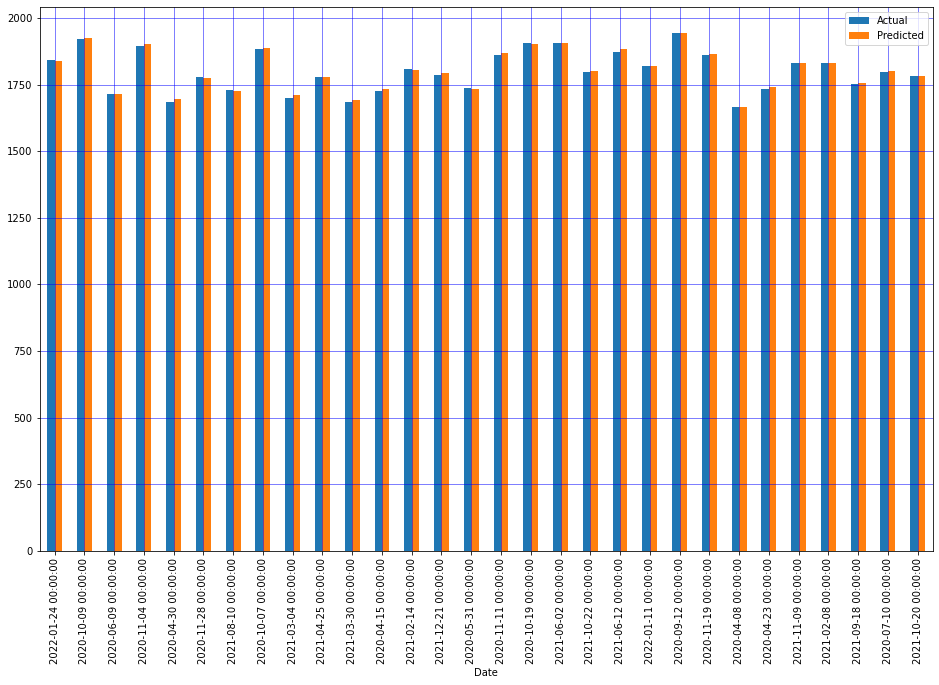

In [60]:
final_plot = result.head(30)
final_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [64]:
predict = rf_regressor.predict(x_test)
print(predict)
print(predict.shape)

[1839.58533366 1926.64899038 1713.25635905 1903.72923713 1694.50298096
 1775.37932088 1726.40452749 1886.61882629 1709.67068563 1777.89248454
 1690.11097168 1733.30681163 1804.84551758 1792.34098796 1736.20064962
 1868.16833455 1903.45826172 1906.8486618  1802.86746704 1882.46382467
 1818.52800262 1945.67334229 1864.25731852 1668.83181641 1740.25101603
 1829.43002157 1832.82300863 1756.52767456 1800.28100891 1784.15192057
 1964.12033081 1730.85852743 1867.42499227 1856.22764526 1903.21532389
 1768.76233398 1683.17963094 1794.7681488  1779.06300079 1966.15601074
 1903.54317139 1731.0789917  1734.44982096 1759.22432292 1781.41500448
 1853.54429769 1816.21568481 1768.93401449 1863.5146818  1832.17517436
 1879.97850159 1774.08597087 1834.48300578 1716.99285807 1806.55817922
 1789.96531453 1662.93432129 1746.20735433 1791.28565389 1761.72902262
 1799.85598267 1751.59200887 1836.53733887 1727.51651286 1952.78699219
 1727.49782806 1801.72599396 1793.97690582 1735.02600016 1731.20332011
 1733.

In [65]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=data.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")


onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")


In [66]:
onemonth_df_pred = pd.read_csv('one-month-predictions.csv')
onemonth_df_pred

,Unnamed: 0,Predictions
0,2022-03-24,1839.585334
1,2022-03-25,1926.648990
2,2022-03-26,1713.256359
3,2022-03-27,1903.729237
4,2022-03-28,1694.502981
5,2022-03-29,1775.379321
6,2022-03-30,1726.404527
7,2022-03-31,1886.618826
8,2022-04-01,1709.670686
9,2022-04-02,1777.892485


Buy price and date
    Unnamed: 0  Predictions
10  2022-04-03  1690.110972
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-25   1926.64899


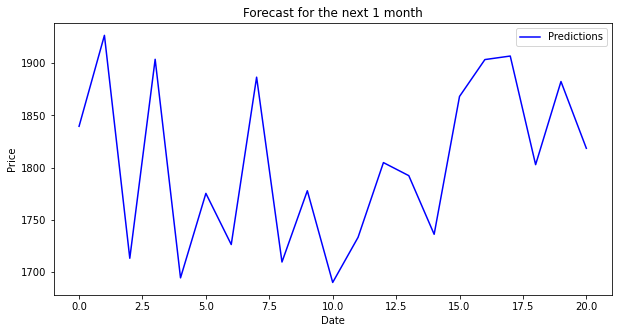

In [67]:
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()